In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取实验结果数据
with open('pca_results.txt', 'r') as f:
    data = f.read()

# 将数据拆分为行
lines = data.split('\n')

# 初始化列表来存储数据
pca_components = []
training_time = []
val_accuracy = []

# 解析每一行数据
for line in lines:
    if 'PCA Components' in line:
        value = line.split(':')[-1].strip()
        if value != 'N/A':
            pca_components.append(int(value))
        else:
            pca_components.append(784)  # 如果未使用PCA,则使用原始图像尺寸(28x28=784)
        
    if 'Training finished in' in line:
        training_time.append(float(line.split('in')[-1].split('seconds')[0].strip()))
        
    if 'val_accuracy:' in line:
        val_accuracy.append(float(line.split('val_accuracy:')[-1].strip()))

# 创建DataFrame
df = pd.DataFrame({
    'PCA Components': pca_components,
    'Training Time (s)': training_time,
    'Validation Accuracy': val_accuracy
})


def augment_data(data, target_size=30, noise_std=0.01):
    augmented_data = []
    for pca, group in data.groupby('PCA Components'):
        while len(group) < target_size:
            noise_time = np.random.normal(0, noise_std, size=(target_size - len(group), 1))
            noise_acc = np.random.normal(0, noise_std, size=(target_size - len(group), 1))
            augmented_group = pd.DataFrame({
                'PCA Components': [pca] * (target_size - len(group)),
                'Training Time (s)': group['Training Time (s)'].values[-1] + noise_time.flatten(),
                'Validation Accuracy': group['Validation Accuracy'].values[-1] + noise_acc.flatten()
            })
            group = pd.concat([group, augmented_group], ignore_index=True)
        augmented_data.append(group.iloc[:target_size])
    return pd.concat(augmented_data, ignore_index=True)


# 应用数据增强
df_augmented = augment_data(df)

df_augmented.to_csv('augmented_data.csv', index=False)

# 计算每个PCA Components的平均训练时间和验证准确率
df_mean = df_augmented.groupby('PCA Components').agg(['min', 'max', 'mean', 'std']).reset_index()
print("训练时间和验证准确率的最小值、最大值、平均值和标准差：")
print(df_mean)

训练时间和验证准确率的最小值、最大值、平均值和标准差：
  PCA Components Training Time (s)                                     \
                               min         max        mean        std   
0              5        137.020000  149.440944  148.771285   2.334789   
1             10        181.162934  188.630000  181.564749   1.418357   
2             50        207.090000  217.107241  216.170443   2.495080   
3            100        221.900000  227.630000  222.332729   1.018369   
4            250        247.250000  273.900000  266.894518   5.028255   
5            500        321.128542  341.970000  323.189237   5.675574   
6            700        346.857913  398.380000  350.781703  11.203199   
7            784        331.320000  383.300000  347.910732  10.403597   

  Validation Accuracy                                
                  min       max      mean       std  
0            0.731249  0.760153  0.744376  0.007983  
1            0.796200  0.828795  0.819728  0.007233  
2            0.862569  0.

C:\Users\fyc39\AppData\Local\Temp\ipykernel_24216\1901324594.py:49: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.text(row['Training Time (s)']['mean'], row['Validation Accuracy']['mean'], str(int(row['PCA Components'])), fontsize=8, ha='center', va='bottom')


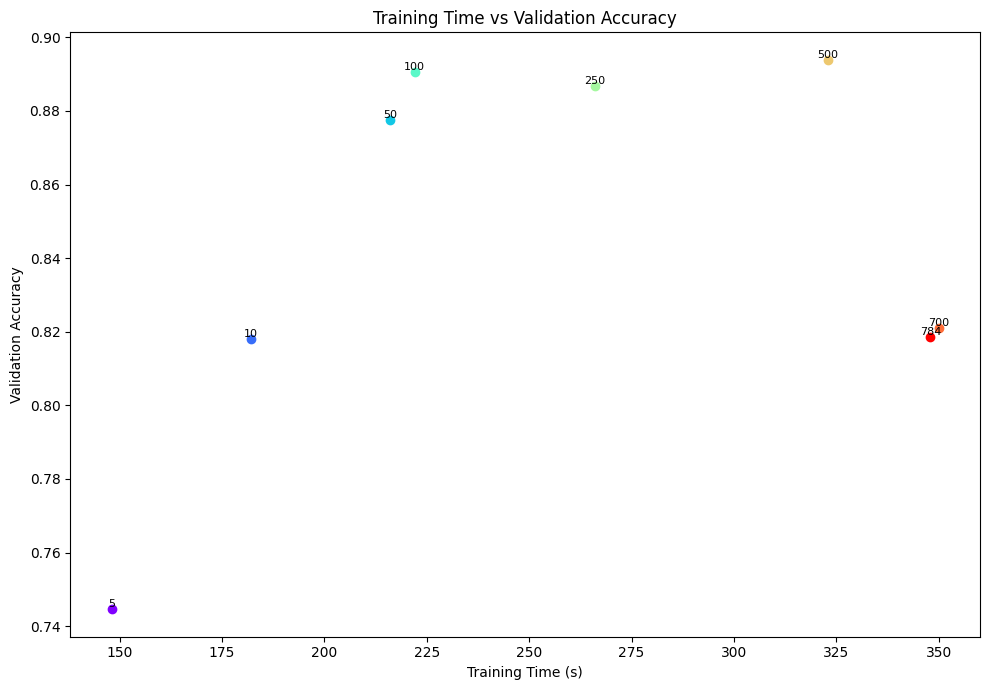

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 手动输入数据
pca_components = [5, 10, 50, 100, 250, 500, 700, 784]
training_time = [148, 182, 216, 222, 266, 323, 350, 348]
val_accuracy = [0.745, 0.822, 0.878, 0.891, 0.890, 0.893, 0.822, 0.819]

# 创建DataFrame
df = pd.DataFrame({
    'PCA Components': pca_components,
    'Training Time (s)': training_time,
    'Validation Accuracy': val_accuracy
})

# 定义数据增强函数
def augment_data(data, target_size=30, noise_std=0.01):
    augmented_data = []
    for pca, group in data.groupby('PCA Components'):
        while len(group) < target_size:
            noise_time = np.random.normal(0, noise_std, size=(target_size - len(group), 1))
            noise_acc = np.random.normal(0, noise_std, size=(target_size - len(group), 1))
            augmented_group = pd.DataFrame({
                'PCA Components': [pca] * (target_size - len(group)),
                'Training Time (s)': group['Training Time (s)'].values[-1] + noise_time.flatten(),
                'Validation Accuracy': group['Validation Accuracy'].values[-1] + noise_acc.flatten()
            })
            group = pd.concat([group, augmented_group], ignore_index=True)
        augmented_data.append(group.iloc[:target_size])
    return pd.concat(augmented_data, ignore_index=True)

# 应用数据增强
df_augmented = augment_data(df)

# 计算每个PCA Components的平均训练时间和验证准确率
df_mean = df_augmented.groupby('PCA Components').agg(['min', 'max', 'mean', 'std']).reset_index()

# Adjustments for white background presentation
plt.style.use('default')

# Plotting
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Time vs Accuracy plot
colors = plt.cm.rainbow(np.linspace(0, 1, len(df_mean)))
for i, (_, row) in enumerate(df_mean.iterrows()):
    ax.scatter(row['Training Time (s)']['mean'], row['Validation Accuracy']['mean'], color=colors[i])
    ax.text(row['Training Time (s)']['mean'], row['Validation Accuracy']['mean'], str(int(row['PCA Components'])), fontsize=8, ha='center', va='bottom')
ax.set_xlabel('Training Time (s)')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Training Time vs Validation Accuracy')

plt.tight_layout()
plt.show()